# PHYS 210 Lecture 15 - Oct 30, 2024
Agenda:

1. Announcements
1. Reading recap, polling questions and Q&A
1. Group Worksheet

### Important dates for the rest of the term
| | |
| :--- | :--- |
| Mon., Nov. 04 | Project 03 details released |
| Thu., Nov. 07 | Project submission deadline #4 (2 submissions allowed) |
| Nov. 11 - 13 | Midterm break |
| Mon., Nov. 18 | Project 03 feedback draft due |
| Mon., Nov. 25 | Project submission deadline #5 (2 submissions allowed) |
| Dec. 02 & 04  | In-class poster presentations |
| Tue., Dec. 10 | Project submission deadline #6 (1 submission allowed) |
| Mon., Nov. 16 | Project submission deadline #7 (1 submissions allowed) |

## Reading recap, ~~polling questions~~ and Q&A

**Q:** Why does the chi-squared graph vs omega graph tell us about the best fit parameters?

**A:** `curve_fit` is a nonlinear fitting function, meaning it can fit functions other than straight lines, and as a result every fit that it does requires initial guesses, where the defaults are `1` for each parameter if not specified. Long example alert!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

t_data = np.array([ 0.        ,  0.25645654,  0.51291309,  0.76936963,  1.02582617,
        1.28228272,  1.53873926,  1.7951958 ,  2.05165235,  2.30810889,
        2.56456543,  2.82102197,  3.07747852,  3.33393506,  3.5903916 ,
        3.84684815,  4.10330469,  4.35976123,  4.61621778,  4.87267432,
        5.12913086,  5.38558741,  5.64204395,  5.89850049,  6.15495704,
        6.41141358,  6.66787012,  6.92432667,  7.18078321,  7.43723975,
        7.69369629,  7.95015284,  8.20660938,  8.46306592,  8.71952247,
        8.97597901,  9.23243555,  9.4888921 ,  9.74534864, 10.00180518,
       10.25826173, 10.51471827, 10.77117481, 11.02763136, 11.2840879 ,
       11.54054444, 11.79700098, 12.05345753, 12.30991407, 12.56637061])
y_data = np.array([-1.71815239e-03, -2.08015913e-01,  5.64748219e-01,  9.62492904e-01,
        9.20418866e-01,  9.35737259e-01,  1.32776675e+00,  1.58956031e+00,
        1.88558979e+00,  1.66143882e+00,  2.03767118e+00,  2.25638778e+00,
        2.00445035e+00,  2.04773244e+00,  2.17685040e+00,  1.88546903e+00,
        1.81505858e+00,  1.48373884e+00,  1.59274906e+00,  1.57320479e+00,
        9.91393316e-01,  1.08707412e+00,  7.51733967e-01, -4.56799784e-02,
       -3.91397237e-01, -1.96417994e-01, -2.74839190e-01, -4.23692135e-01,
       -7.91822825e-01, -1.31857939e+00, -1.12749963e+00, -1.84915218e+00,
       -1.90104185e+00, -2.06498665e+00, -1.90021998e+00, -1.85630497e+00,
       -2.16964289e+00, -2.38494504e+00, -1.79373814e+00, -1.84252623e+00,
       -1.61829111e+00, -1.70084067e+00, -1.63726353e+00, -1.41318373e+00,
       -1.14480241e+00, -1.20080281e+00, -9.50884586e-01, -8.69321294e-01,
       -1.45618763e-01, -2.32657944e-01])

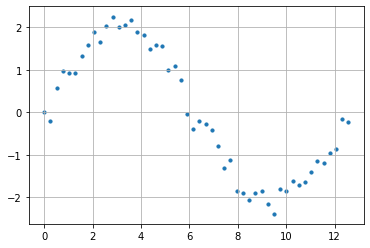

In [2]:
plt.scatter(t_data, y_data, s=10)
plt.grid(True); plt.show()

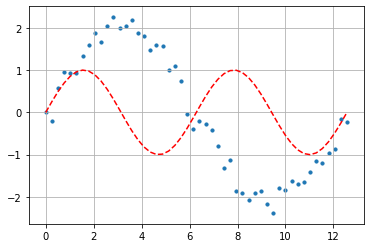

In [3]:
def sin_model(x, a, omega):
    return a * np.sin(omega * x)

def make_plots(p0):
    plt.plot(t_data, sin_model(t_data, *p0), 'r--')
    plt.scatter(t_data, y_data, s=10)
    plt.grid(True); plt.show
    
make_plots(p0=[1,1]) # a, omega

In [4]:
def make_plots(p0):
    residuals = y_data - sin_model(t_data, *p0)
    sors = sum(residuals**2)
    print(f"Sum of residuals squared = {sors:.1f}")
    fig, ax = plt.subplots(2,1,figsize=(8,6))
    ax[0].plot(t_data, sin_model(t_data, *p0), 'r--')
    ax[0].scatter(t_data, y_data, s=10)
    ax[0].grid(True)
    ax[1].scatter(t_data, residuals)
    ax[1].grid(True)
    plt.show

Sum of residuals squared = 2.2


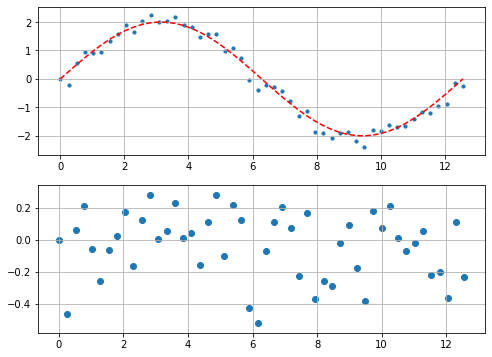

In [5]:
make_plots(p0=[2,0.5]) # a, omega

Sum of residuals squared = 132.9


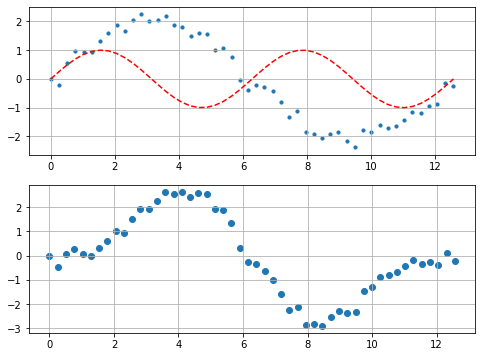

In [6]:
make_plots(p0=[1,1]) # a, omega

In [7]:
def get_sors(p0):
    residuals = y_data - sin_model(t_data, *p0)
    sors = sum(residuals**2)
    return sors

# Create meshgrid
a_vals = np.linspace(0.1, 2, 100)
A, B = np.meshgrid(a_vals, a_vals)

# Calculate SORS for each combination of parameters
SORS = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        SORS[i, j] = get_sors([A[i, j], B[i, j]])

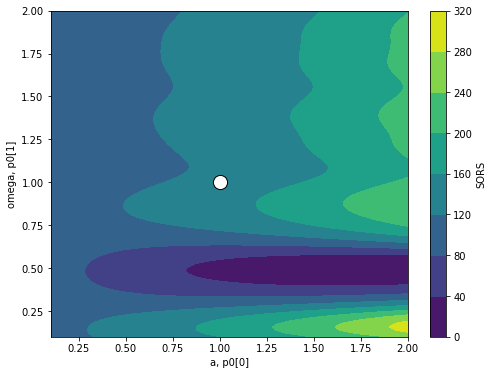

In [8]:
# Plot
plt.figure(figsize=(8,6))
cp = plt.contourf(A, B, SORS, cmap="viridis")
plt.colorbar(cp, label="SORS")
plt.scatter(1, 1, color="white", s=200, zorder=5, edgecolor="black")
plt.xlabel("a, p0[0]"); plt.ylabel("omega, p0[1]")
plt.show()

In [9]:
# Create meshgrid
a_vals = np.linspace(0.75, 1.25, 100)
A, B = np.meshgrid(a_vals, a_vals)

# Calculate SORS for each combination of parameters
SORS = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        SORS[i, j] = get_sors([A[i, j], B[i, j]])

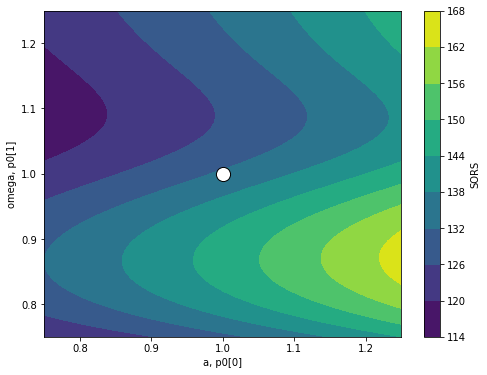

In [10]:
# Plot
plt.figure(figsize=(8,6))
cp = plt.contourf(A, B, SORS, cmap="viridis")
plt.colorbar(cp, label="SORS")
plt.scatter(1, 1, color="white", s=200, zorder=5, edgecolor="black")
plt.xlabel("a, p0[0]"); plt.ylabel("omega, p0[1]")
plt.show()

In [11]:
def make_fit(p0):
    popt, _ = curve_fit(sin_model, t_data, y_data, p0=p0)
    plt.plot(t_data, sin_model(t_data, *popt), 'r--')
    plt.scatter(t_data, y_data, s=10)
    fit_params = f"a = {popt[0]:.2f}\nomega = {popt[1]:.2f}"
    plt.text(0.05, 0.95, fit_params, transform=plt.gca().transAxes, verticalalignment='top', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.5))
    plt.grid(True); plt.show

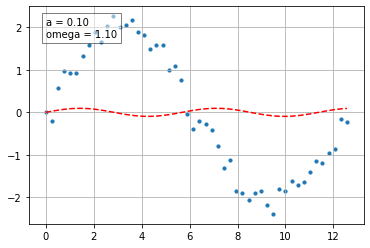

In [12]:
make_fit(p0=[1, 1])

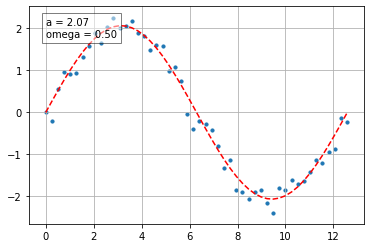

In [13]:
make_fit(p0=[.5, .25])

## The rest of today
Group Worksheet 15: Fitting and generating simulated data. Fun!